In [1]:
import pandas as pd
train_df = pd.read_csv(r'train.csv')
train_right_df = train_df[train_df["target"]==1]
train_wrong_df = train_df[train_df["target"]==0]

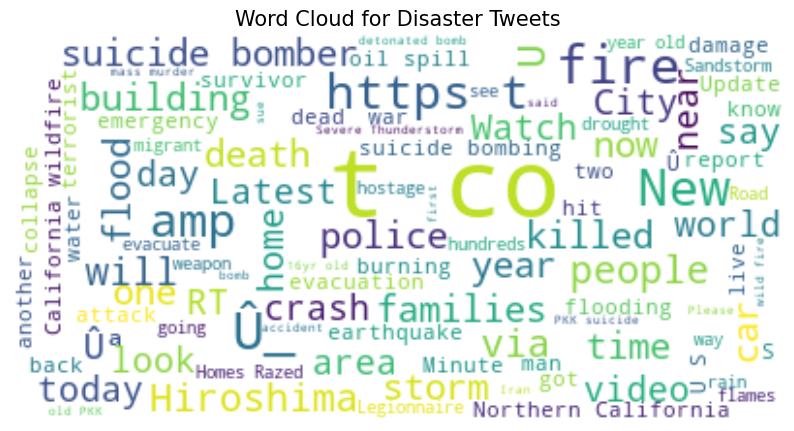

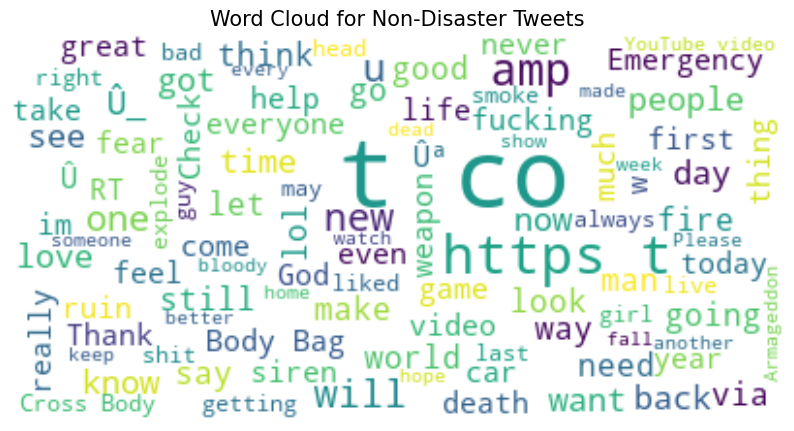

In [2]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Function to generate a word cloud
def generate_word_cloud(data, title):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()


generate_word_cloud(train_right_df['text'], "Word Cloud for Disaster Tweets")
generate_word_cloud(train_wrong_df['text'], "Word Cloud for Non-Disaster Tweets")

In [3]:
from NlpStudyFunctions import GetTopWords
top_words = 10
top_words_right = GetTopWords(train_right_df,top_words)
top_words_wrong = GetTopWords(train_wrong_df,top_words)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guibe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guibe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['test', 'tweet', 'visit', 'info', 'exciting']


c:\Users\guibe\OneDrive\Área de Trabalho\New folder (2)\NlpStudyFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['text'].apply(SimplePreprocessText)


         Word  Frequency
0        fire        182
1        news        139
2    disaster        121
3         via        121
4  california        115
5     suicide        112
6      police        109
7      people        105
8      killed         95
9        like         94
     Word  Frequency
0    like        254
1     new        170
2     get        163
3     one        131
4    body        116
5   would        101
6     via         99
7   video         96
8  people         94
9     got         92


c:\Users\guibe\OneDrive\Área de Trabalho\New folder (2)\NlpStudyFunctions.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed'] = df['text'].apply(SimplePreprocessText)


C:\Users\guibe\AppData\Local\Temp\ipykernel_8784\3096321831.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_right.values, y=keyword_right.index, ax=ax[0], palette="Reds_r")
C:\Users\guibe\AppData\Local\Temp\ipykernel_8784\3096321831.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=keyword_wrong.values, y=keyword_wrong.index, ax=ax[1], palette="Blues_r")


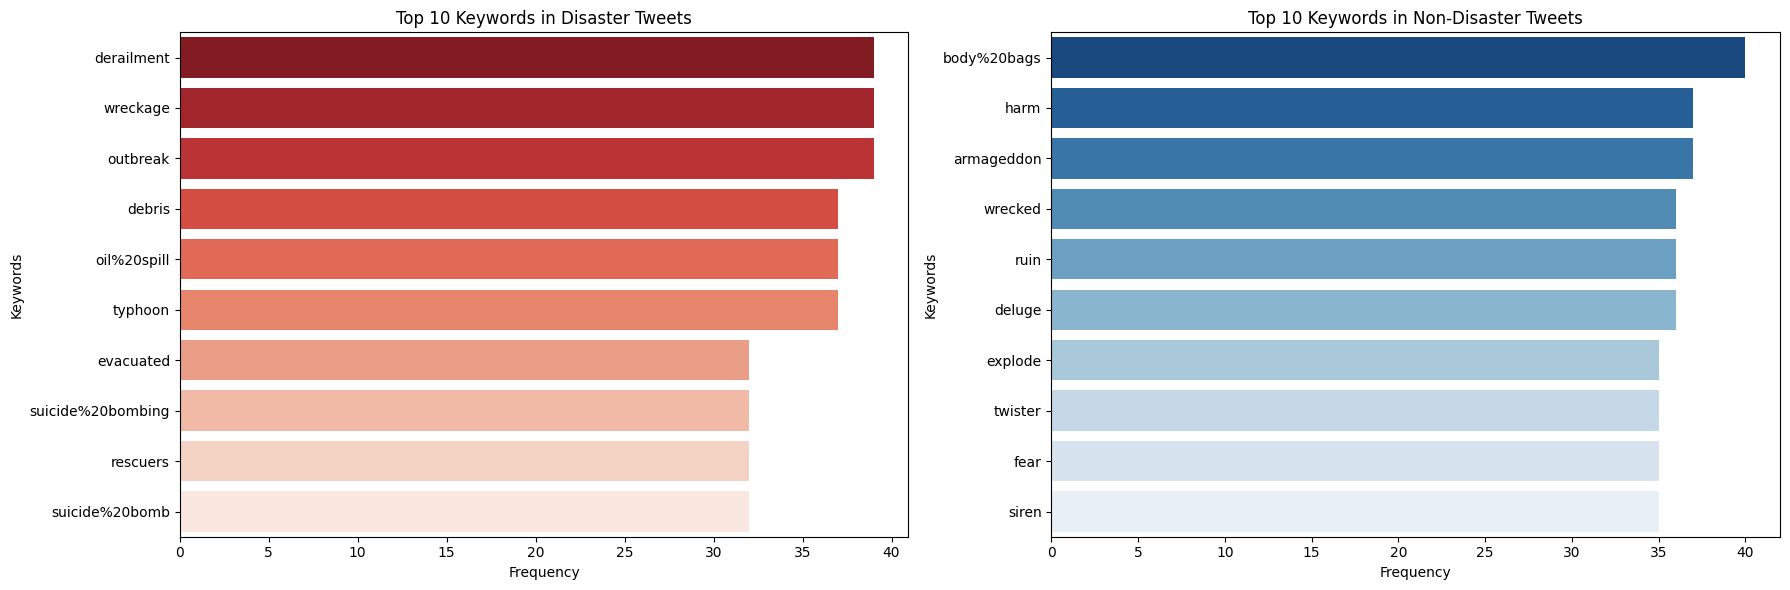

In [4]:
import seaborn as sns

keyword_right = train_df[train_df['target'] == 1]['keyword'].value_counts().head(10)
keyword_wrong = train_df[train_df['target'] == 0]['keyword'].value_counts().head(10)

fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Disaster Keywords
sns.barplot(x=keyword_right.values, y=keyword_right.index, ax=ax[0], palette="Reds_r")
ax[0].set_title('Top 10 Keywords in Disaster Tweets')
ax[0].set_xlabel('Frequency')
ax[0].set_ylabel('Keywords')

# Non-Disaster Keywords
sns.barplot(x=keyword_wrong.values, y=keyword_wrong.index, ax=ax[1], palette="Blues_r")
ax[1].set_title('Top 10 Keywords in Non-Disaster Tweets')
ax[1].set_xlabel('Frequency')
ax[1].set_ylabel('Keywords')

plt.tight_layout()
plt.show()